In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.shape,df_test.shape

((8693, 14), (4277, 13))

In [3]:
df_test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [4]:
df_train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


TypeError: 'value' must be an instance of str or bytes, not a float

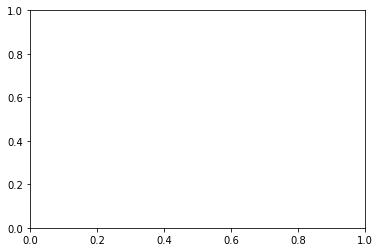

In [5]:
#data visualization
fig, ax= plt.subplots()
ax.bar(df_test.index,df_test['Destination'],color='r',label= 'Destination')
ax.bar(df_test.index,df_test['Transported'],color='b',label= 'Transported')
plt.show()

In [ ]:
#missing values
df_train['Transported'].isna().sum()

In [ ]:
#duplicated values
df_train.duplicated().sum()

In [ ]:
#data split
data = pd.concat([df_train,df_test],axis = 0,ignore_index= True)
data['Transported'].fillna(method='ffill',inplace = True)
data = pd.get_dummies(data)
data['Transported'] = data['Transported'].astype(int)
train1 = data.iloc[:df_train.shape[0],:]
test1= data.iloc[df_train.shape[0]:,:]
train1.shape,test1.shape

In [ ]:
#outliers

In [ ]:
#training
train1= pd.concat([train1,train1],axis=1)
x= train1.drop(columns ='Transported')
pred = test1.drop(columns ='Transported')
y = train1['Transported']
x.shape, y.shape, pred.shape

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.10)
x_train.shape,y_train.shape,x_test.shape,y_test.shape,pred.shape

In [ ]:
x_train=np.array(x_train,dtype='float64')
x_test=np.array(x_test,dtype='float64')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=(28,)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history= model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs= 5,batch_size = 8)